In [627]:
# Let's import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
#from xgboost import XGBRegressor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [629]:
# Let's load the dataset

df = pd.read_csv(r'/Users/varun/Downloads/emp_data.csv')

In [631]:
df.head()

,EmpID,FirstName,LastName,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,Zone C,...,Production,Finance & Accounting,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,Zone A,...,Production,Aerial,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,Zone B,...,Sales,General - Sga,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,Zone A,...,Sales,Finance & Accounting,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,Zone A,...,Sales,General - Con,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [633]:
df.tail()

,EmpID,FirstName,LastName,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
2995,3422,Jakobe,Erickson,Production Technician I,Bethany Carter,jakobe.erickson@bilearner.com,PYZ,Leave of Absence,Part-Time,Zone C,...,Production,Engineers,MA,Model Assistant,Female,44500,Other,Widowed,Fully Meets,3
2996,3423,Adyson,Strickland,Production Technician I,Caroline Harris,adyson.strickland@bilearner.com,SVG,Active,Part-Time,Zone A,...,Production,Engineers,MA,Engineer,Male,35444,Black,Widowed,Fully Meets,3
2997,3424,Annabel,Wilkins,Production Technician I,Mr. James Castillo,annabel.wilkins@bilearner.com,TNS,Voluntarily Terminated,Contract,Zone B,...,Production,Wireline Construction,MA,Laborer,Male,6608,White,Single,Fully Meets,2
2998,3425,Kendra,Braun,Production Technician I,Michael Woods,kendra.braun@bilearner.com,WBL,Voluntarily Terminated,Contract,Zone B,...,Production,Aerial,MA,Foreman,Female,3807,Hispanic,Divorced,Fully Meets,2
2999,3426,Chace,Kerr,Production Technician I,Javier Mccall,chace.kerr@bilearner.com,BPC,Active,Full-Time,Zone B,...,Production,Field Operations,MA,Warehouse Technician,Female,57487,White,Married,Fully Meets,2


In [635]:
# Let's replace all the NaN, empty values with NULL

df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   Title                       3000 non-null   object
 4   Supervisor                  3000 non-null   object
 5   ADEmail                     3000 non-null   object
 6   BusinessUnit                3000 non-null   object
 7   EmployeeStatus              3000 non-null   object
 8   EmployeeType                3000 non-null   object
 9   PayZone                     3000 non-null   object
 10  EmployeeClassificationType  3000 non-null   object
 11  TerminationType             3000 non-null   object
 12  AttritionValue              3000 non-null   int64 
 13  TerminationDescription      3000 non-null   obje

In [639]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
EmpID,3000.0,2500.50,866.17,1001.0,1750.75,2500.5,3250.25,4000.0
AttritionValue,3000.0,0.51,0.50,0.0,0.00,1.0,1.00,1.0
LocationCode,3000.0,44997.18,29987.33,1013.0,17546.00,44150.5,71481.25,98052.0
Current Employee Rating,3000.0,2.97,1.02,1.0,2.00,3.0,3.00,5.0


In [641]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmpID,3000.0,NaN,NaN,NaN,2500.5,866.169729,1001.0,1750.75,2500.5,3250.25,4000.0
FirstName,3000,1597,Harley,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastName,3000,1137,Preston,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,3000,32,Production Technician I,1321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supervisor,3000,2952,John Smith,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADEmail,3000,2998,larissa.warner@bilearner.com,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessUnit,3000,10,NEL,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeStatus,3000,5,Active,2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeType,3000,3,Full-Time,1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PayZone,3000,3,Zone A,1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [643]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['EmpID', 'AttritionValue', 'LocationCode', 'Current Employee Rating']
Categorical variables: ['FirstName', 'LastName', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division', 'State', 'JobFunctionDescription', 'GenderCode', 'RaceDesc', 'MaritalDesc', 'Performance Score']


In [645]:
# Counting Unique values for categorical variables

print(df.select_dtypes(include=['object']).nunique())

FirstName                     1597
LastName                      1137
Title                           32
Supervisor                    2952
ADEmail                       2998
BusinessUnit                    10
EmployeeStatus                   5
EmployeeType                     3
PayZone                          3
EmployeeClassificationType       3
TerminationType                  5
TerminationDescription        1534
DepartmentType                   6
Division                        25
State                           28
JobFunctionDescription          83
GenderCode                       2
RaceDesc                         5
MaritalDesc                      4
Performance Score                4
dtype: int64


In [647]:
# Analyzing the dataset for missing value

missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
EmpID,0,0.0
FirstName,0,0.0
LastName,0,0.0
Title,0,0.0
Supervisor,0,0.0
ADEmail,0,0.0
BusinessUnit,0,0.0
EmployeeStatus,0,0.0
EmployeeType,0,0.0
PayZone,0,0.0


In [649]:
df.isnull().sum()

EmpID                         0
FirstName                     0
LastName                      0
Title                         0
Supervisor                    0
ADEmail                       0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
TerminationType               0
AttritionValue                0
TerminationDescription        0
DepartmentType                0
Division                      0
State                         0
JobFunctionDescription        0
GenderCode                    0
LocationCode                  0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
dtype: int64

In [651]:
# Handling missing values. Let's fill the missing numerical variables with mean and categorical values with mode

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [653]:
missing_values = df.isnull().sum()
print(missing_values)

EmpID                         0
FirstName                     0
LastName                      0
Title                         0
Supervisor                    0
ADEmail                       0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
TerminationType               0
AttritionValue                0
TerminationDescription        0
DepartmentType                0
Division                      0
State                         0
JobFunctionDescription        0
GenderCode                    0
LocationCode                  0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
dtype: int64


In [655]:
# Checking for duplicate values

duplicate_values = df.duplicated().sum()
print(duplicate_values)

0


In [657]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_df = pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Display summary statistics of categorical variables
display(df[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_df)

,FirstName,LastName,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,TerminationDescription,DepartmentType,Division,State,JobFunctionDescription,GenderCode,RaceDesc,MaritalDesc,Performance Score
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,1597,1137,32,2952,2998,10,5,3,3,3,5,1534,6,25,28,83,2,5,4,4
top,Harley,Preston,Production Technician I,John Smith,larissa.warner@bilearner.com,NEL,Active,Full-Time,Zone A,Temporary,Unknown,Other,Production,Field Operations,MA,Laborer,Female,Asian,Single,Fully Meets
freq,9,10,1321,3,2,304,2458,1038,1062,1033,1467,1467,2020,789,2651,522,1682,629,772,2361


count
column  value                                  
ADEmail abby.curtis@bilearner.com             1
        abdullah.pruitt@bilearner.com         1
        abdullah.frederick@bilearner.com      1
        abdullah.ellison@bilearner.com        1
        abdullah.arellano@bilearner.com       1
...                                         ...
Title   Software Engineer                    90
        Production Manager                  154
        Area Sales Manager                  297
        Production Technician II            516
        Production Technician I            1321

[10436 rows x 1 columns]

In [659]:
df.describe(include='O').T

,count,unique,top,freq
FirstName,3000,1597,Harley,9
LastName,3000,1137,Preston,10
Title,3000,32,Production Technician I,1321
Supervisor,3000,2952,John Smith,3
ADEmail,3000,2998,larissa.warner@bilearner.com,2
BusinessUnit,3000,10,NEL,304
EmployeeStatus,3000,5,Active,2458
EmployeeType,3000,3,Full-Time,1038
PayZone,3000,3,Zone A,1062
EmployeeClassificationType,3000,3,Temporary,1033


In [661]:
# Splitting categorical and numerical columns

catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)

print("Categorical Columns:",catcol)
print("Numerical Columns:", numcol)

Categorical Columns: ['FirstName', 'LastName', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division', 'State', 'JobFunctionDescription', 'GenderCode', 'RaceDesc', 'MaritalDesc', 'Performance Score']
Numerical Columns: ['EmpID', 'AttritionValue', 'LocationCode', 'Current Employee Rating']


In [663]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Your DataFrame
df = pd.read_csv(r'/Users/varun/Downloads/emp_data.csv')  # or df = your DataFrame object

# Columns to encode and later inverse
cols_to_encode = ['FirstName', 'LastName', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit',
                  'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType',
                  'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division',
                  'State', 'JobFunctionDescription', 'GenderCode', 'RaceDesc',
                  'MaritalDesc', 'Performance Score']

# Step 1: Encode and store the encoders
encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # encode
    encoders[col] = le  # store encoder

df.head()

# Now df is encoded

# Step 2: Inverse the transformation

#for col in cols_to_encode:
#    le = encoders[col]
#    df[col] = le.inverse_transform(df[col])

#df.head()

# Now df has original string values back

,EmpID,FirstName,LastName,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,1527,124,22,2274,2870,1,0,0,2,...,3,8,10,1,0,34904,4,3,1,4
1,3428,1258,973,22,2338,2349,2,0,0,0,...,3,0,10,46,1,6593,2,3,1,3
2,3429,485,135,2,638,903,5,0,1,1,...,4,11,10,7,1,2330,2,3,1,4
3,3430,1154,881,2,2325,2161,1,0,0,0,...,4,8,14,18,1,58782,3,2,1,2
4,3431,738,785,2,1212,1363,8,0,0,0,...,4,9,5,47,0,33174,3,1,1,3


In [665]:
# Data Scaling

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

for col in numcol[1:]:
    df[[col]] = scale.fit_transform(df[[col]])

df.head()

,EmpID,FirstName,LastName,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,1527,124,22,2274,2870,1,0,0,2,...,3,8,10,1,0,0.349251,4,3,1,0.75
1,3428,1258,973,22,2338,2349,2,0,0,0,...,3,0,10,46,1,0.057503,2,3,1,0.50
2,3429,485,135,2,638,903,5,0,1,1,...,4,11,10,7,1,0.013572,2,3,1,0.75
3,3430,1154,881,2,2325,2161,1,0,0,0,...,4,8,14,18,1,0.595317,3,2,1,0.25
4,3431,738,785,2,1212,1363,8,0,0,0,...,4,9,5,47,0,0.331423,3,1,1,0.50


In [667]:
df[['EmpID', 'TerminationType', 'AttritionValue']].head()

,EmpID,TerminationType,AttritionValue
0,3427,3,0.0
1,3428,3,0.0
2,3429,3,0.0
3,3430,3,0.0
4,3431,3,0.0


In [669]:
# Now, let's divide our data into training and testing data

x = df.drop('Performance Score',axis=1)
y = df['AttritionValue']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=42)

In [671]:
# Print the shapes of the resulting sets

print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (2550, 23) (2550,)
Testing set shape: (450, 23) (450,)


In [675]:
# Diving into Model building

def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [677]:
models = {
            "Linear Regression" : LinearRegression()
}

In [679]:
score_text=""
for i in range(len(models)):
            model = list(models.values())[i]
            model.fit(x_train,y_train)

            #Make prediction:
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

# Evaluate Train and Test dataset :

            model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
            model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
            model_name = list(models.keys())[i]
           
            print(model_name)

            print("Model Performance for Training set :")

            print('1. Root Mean Squared Error :', model_train_rmse)
            print("2. Mean Absolute Error : ", model_train_mae)
            print("3. R2 Score : ", model_train_r2)

            print("----------------------------------------------------")
            
            print("Model Performance for Testing set :")

            print('1. Root Mean Squared Error : ', model_test_rmse)
            print('2. Mean Absolute Error :  ',{model_test_mae})
            print('3. R2 Score : ', {model_test_r2})
            print()

Linear Regression
Model Performance for Training set :
1. Root Mean Squared Error : 1.7426612062903477e-15
2. Mean Absolute Error :  1.3955422032746914e-15
3. R2 Score :  1.0
----------------------------------------------------
Model Performance for Testing set :
1. Root Mean Squared Error :  1.7454039484669433e-15
2. Mean Absolute Error :   {1.413108390057781e-15}
3. R2 Score :  {1.0}



In [683]:
models = {
    'Logistic Regression':LogisticRegression()
}

In [685]:
from sklearn.metrics import f1_score
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    model_name = list(models.keys())[i]
    print(model_name)
    print("Training set accuracy: ")
    print("Accuracy : ", accuracy_score(y_train,train_preds))
    #print("Confusion matrix: ", confusion_matrix(y_train,train_preds))
    print()
    print('-------------------------------------------------')
    print()
    print("Testing set accuracy: ")
    print("Accuracy : ", accuracy_score(y_test,test_preds))
    #print("Confusion matrix: ", confusion_matrix(y_test,test_preds))
    print()

Logistic Regression
Training set accuracy: 
Accuracy :  0.8733333333333333

-------------------------------------------------

Testing set accuracy: 
Accuracy :  0.8555555555555555



In [4]:
# Summarizing the performance of Logistic Regression model:

# Training dataset accuracy: 87.33% Testing dataset accuracy: 85.55% 
# Logistic Regression achieves moderate-to-high accuracy on both the training and testing datasets.

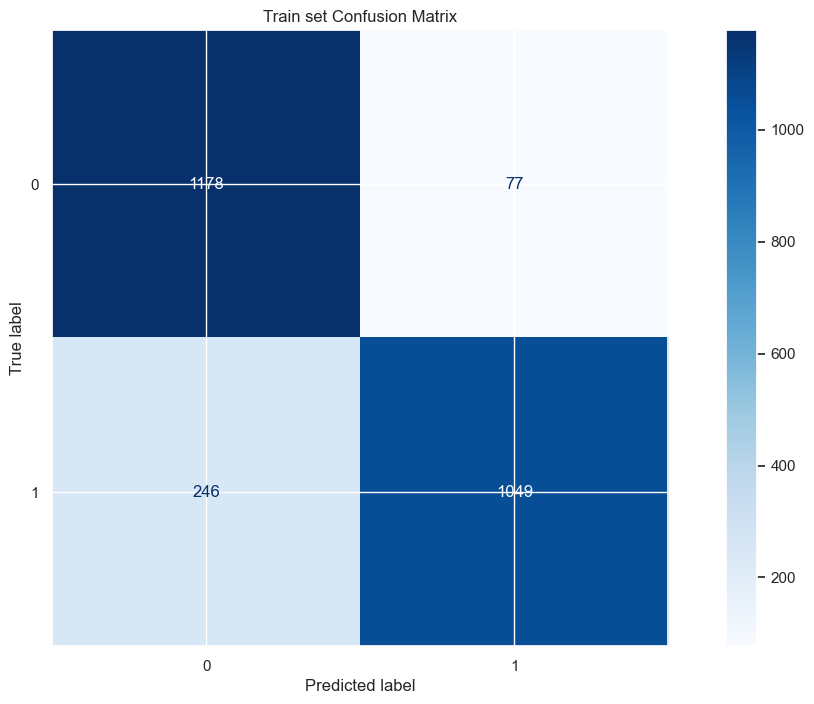

In [689]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_train, train_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Train set Confusion Matrix")
plt.show()

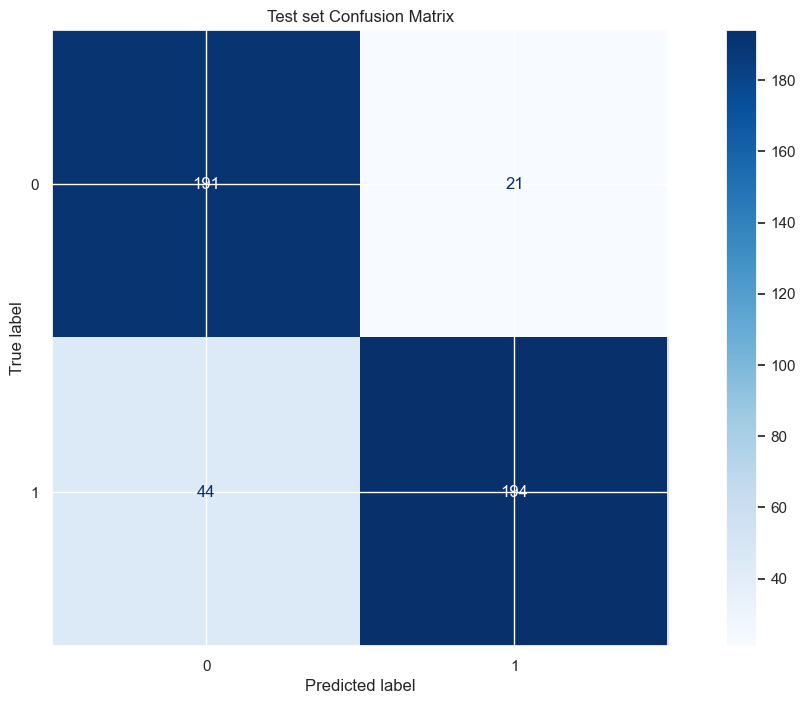

In [691]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Test set Confusion Matrix")
plt.show()

In [693]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['FirstName', 'LastName', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit',
                  'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType',
                  'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division',
                  'State', 'JobFunctionDescription', 'GenderCode', 'RaceDesc',
                  'MaritalDesc', 'Performance Score']

for col in cols_to_encode:
    le = encoders[col]
    df[col] = le.inverse_transform(df[col])

df.head()

,EmpID,FirstName,LastName,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,Zone C,...,Production,Finance & Accounting,MA,Accounting,Female,0.349251,White,Widowed,Fully Meets,0.75
1,3428,Paula,Small,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,Zone A,...,Production,Aerial,MA,Labor,Male,0.057503,Hispanic,Widowed,Fully Meets,0.50
2,3429,Edward,Buck,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,Zone B,...,Sales,General - Sga,MA,Assistant,Male,0.013572,Hispanic,Widowed,Fully Meets,0.75
3,3430,Michael,Riordan,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,Zone A,...,Sales,Finance & Accounting,ND,Clerk,Male,0.595317,Other,Single,Fully Meets,0.25
4,3431,Jasmine,Onque,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,Zone A,...,Sales,General - Con,FL,Laborer,Female,0.331423,Other,Married,Fully Meets,0.50


In [697]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_test is your input test set with original column names
# and y_pred_proba is your model's probability prediction for attrition


x_test_df = pd.DataFrame(x_test, columns=x.columns)
x_test_df['Attrition_Prob'] = model.predict_proba(x_test)[:,1]  # Probability of attrition
x_test_df['Prediction'] = model.predict(x_test)  # Binary yes/no

# Optional: Add employee metadata back in (e.g., ID, department)
# Assuming you stored it before scaling
# x_test_df['EmployeeID'] = df.iloc[x_test_df.index]['EmpID'].values
# x_test_df['Department'] = df.iloc[x_test_df.index]['DepartmentType'].values
# x_test_df['JobRole'] = df.iloc[x_test_df.index]['Title'].values


for col in encoders:
    if col in x_test_df.columns:
        x_test_df[col] = encoders[col].inverse_transform(x_test_df[col])


# Export to CSV
x_test_df.to_csv("Attrition_values.csv", index=False)
